# Second Order finite difference scheme for two point Boundary value Problem


Given Equation: -U''(X)  =  f(X)

U(0)  =  0, U'(1)  =  1

We have to define two schemes S1 and S2 for approximating the solution of this problem.

By S1: ( U𝑛+1 - U𝑛 )/h  = 1 

By S2: (U𝑛+2  -  U𝑛 )/2h  =  1

We know by second order finite difference scheme that u''(x) = ( U𝑗−1 - 2 U𝑗  +  U𝑗+1 )/ $h^{2}$.
Using the above two boundary value conditions in S1 and S2, we can find relations as below:- 

𝑈𝑛 -  𝑈𝑛−1  = h +  $ℎ^{2}$  f( 𝑋𝑛 ) for Scheme S1.

𝑈𝑛  -  𝑈𝑛−1  =  $ℎ^{2}$  f( 𝑋𝑛 ) + h + ( $ℎ^{2}$ /2) f( 𝑋𝑛+1 ) for scheme S2.

In [666]:
#importing necessary modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [718]:
# defining number of grids at the top
n = 3
def coeffmatrix(n):
    A = np.zeros((n,n))
    A[0,0] = 2
    A[0,1] = -1
    A[n-1,n-2] = -1
    A[n-1,n-1] = 1
    for i in range(1,n-1):
        A[i,i-1] = -1
        A[i,i] = 2
        A[i,i+1] = -1  
    return(A)    
        
        
    
    
    
    
    
    




In [719]:
def definex(n):
    h = (1-0)/(n+1)
    X = np.zeros((1,n))
    for i in range(0,n):
        X[0,i] = 0 +((i+1)*h)   
    return(X)    
        
    

In [720]:
def fmatrix(n):
    f = np.zeros((1,n))
    X = definex(n)
    for i in range(0,n):
        f[0,i] = -1* pow(np.e,(X[0,i]-1))   
    return(f)    
    

In [721]:
def bmatrix(n, scheme):
    h = (1-0)/(n+1)
    F = fmatrix(n)
    b = np.zeros((1,n))
    for i in range(0,n):
        b[0,i] = h**2 * F[0,i]
    if scheme == 'S1':
        b[0,n-1] = b[0,n-1] + h
    else:
        b[0,n-1] = (b[0,n-1] + h + (((h**2)/2) * (-1)))
                               
    return(b)                           
    
    
    

In [722]:
def solve(n, scheme):
    a = coeffmatrix(n)
    b = bmatrix(n, scheme)
    y = np.linalg.solve(a,b.T)
    return(definex(n),y)

    
    
    

In [723]:
def exactU(n):
    X = definex(n)
    U = np.zeros((1,n))
    for i in range(0,n):
        U[0,i] = pow((np.e),-1) * (pow(np.e,X[0,i])-1)
    return(U)    
        

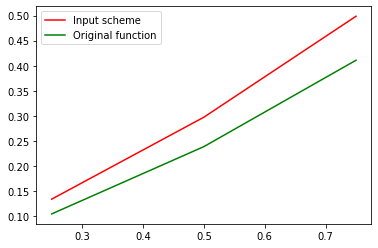

In [724]:
x,u = solve(n , scheme = 'S1')
Uorig = exactU(n)
plt.plot(x.T,u, color='r', label = 'Input scheme')
plt.plot(x.T,Uorig.T, color = 'g', label = 'Original function')
plt.legend()
plt.show()

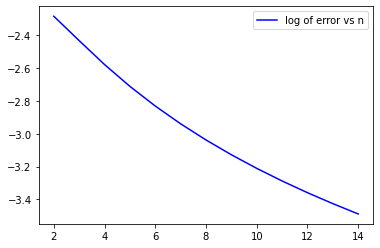

In [729]:
max_error = np.max(abs(Uorig - u.T))
dict[n] = max_error
lists = sorted(dict.items()) 
grids, error = zip(*lists)
plt.plot(grids, np.log(error), color = 'b', label = 'log of error Vs n' )
plt.legend()